### Machine Learning 
+ Supervised ML with Iris Dataset

In [0]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2019-03-13 17:39:37--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2019-03-13 17:39:37 (77.4 MB/s) - ‘iris.csv’ saved [3716/3716]



#### EDA Descriptive

In [0]:
# load our dataset
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.shape

(150, 5)

In [8]:
# Species distribution
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


### Data Visualization
+ Understand each attribute
+ Understand relationship between each

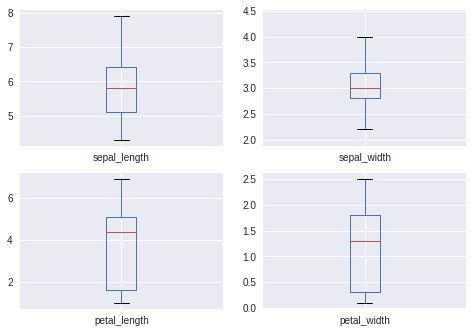

In [9]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

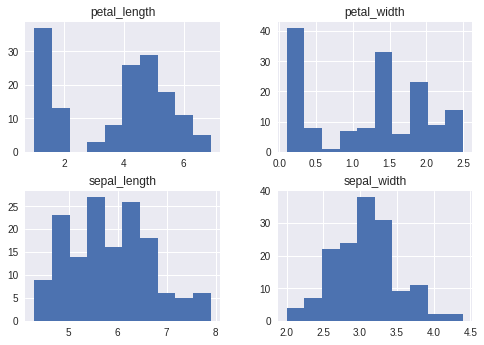

In [10]:
# histograms using pandas plot
df.hist()
plt.show()

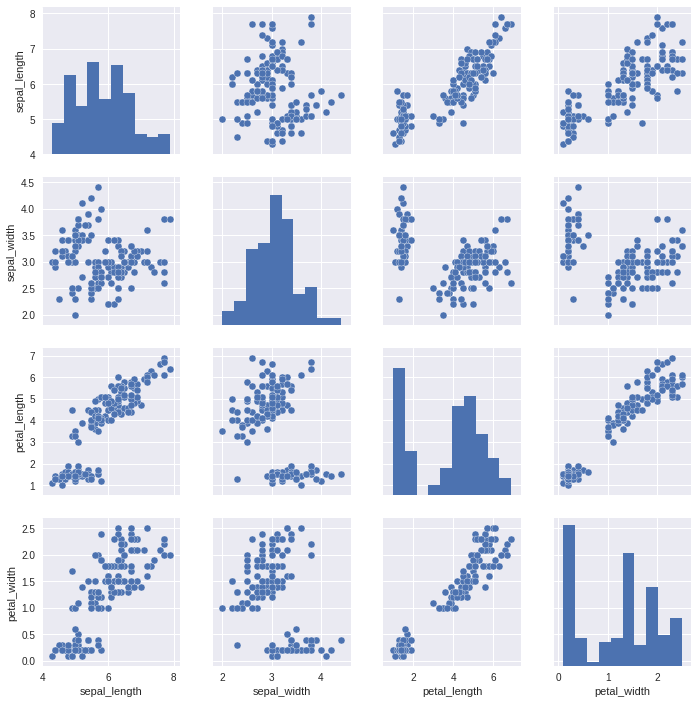

In [11]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

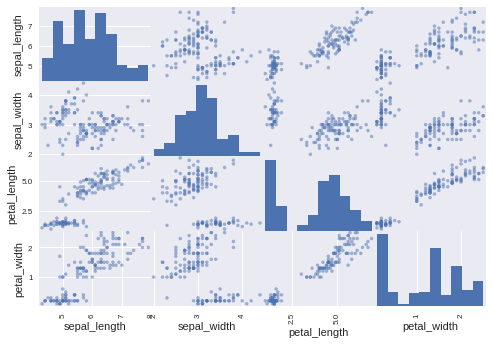

In [12]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


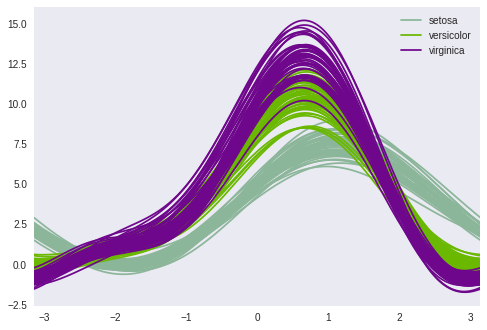

In [13]:
from pandas.tools.plotting import andrews_curves
andrews_curves(df, "species")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


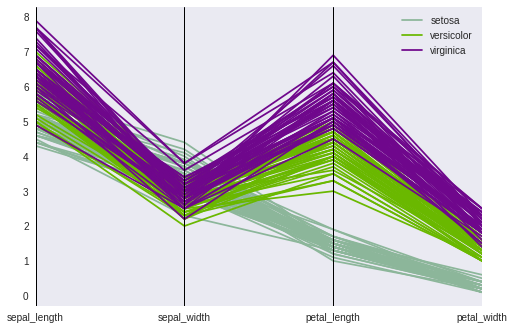

In [14]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, "species")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


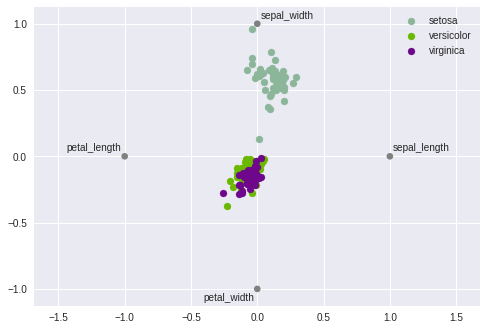

In [15]:
from pandas.tools.plotting import radviz
radviz(df, "species")

In [0]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]


### Train Test Split

In [0]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [19]:
logit.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print("accuracy :" , logit.score(X_validation,Y_validation))

accuracy : 0.8


In [21]:
logit.predict(X_validation)

array(['virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [0]:
# Individual Prediction
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
logit.predict(ex1)

array(['setosa'], dtype=object)

### Saving or Persisting Our Model
+ Pickle 
+ Joblib

In [25]:
from sklearn.externals import joblib
joblib.dump(logit, 'logit_model_iris.pkl') 

['logit_model_iris.pkl']

In [0]:
# Reloading the Model
logit_model = joblib.load('logit_model_iris.pkl')

In [27]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [0]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)


In [29]:
logit_model.predict(ex2)

array(['virginica'], dtype=object)

In [0]:
### Get the Models for the other ML Algorithms

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [33]:
# Fit the model
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

accuracy : 0.9


In [34]:
# save the model to disk
joblib.dump(knn, 'knn_model_iris.pkl') 

['knn_model_iris.pkl']

In [35]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [36]:
# save the model to disk
joblib.dump(dtree, 'dtree_model_iris.pkl') 

['dtree_model_iris.pkl']

In [37]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))

accuracy : 0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
# save the model to disk
joblib.dump(svm, 'svm_model_iris.pkl') 

['svm_model_iris.pkl']

In [42]:
ls


dtree_model_iris.pkl  knn_model_iris.pkl    sample_data/
iris.csv              logit_model_iris.pkl  svm_model_iris.pkl


In [0]:
from google.colab import files
files.download('dtree_model_iris.pkl') 
files.download('knn_model_iris.pkl') 
files.download('logit_model_iris.pkl') 
files.download('svm_model_iris.pkl') 